In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
t_dataset = pd.read_csv("train.csv")
t_dataset.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0


In [3]:
t_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

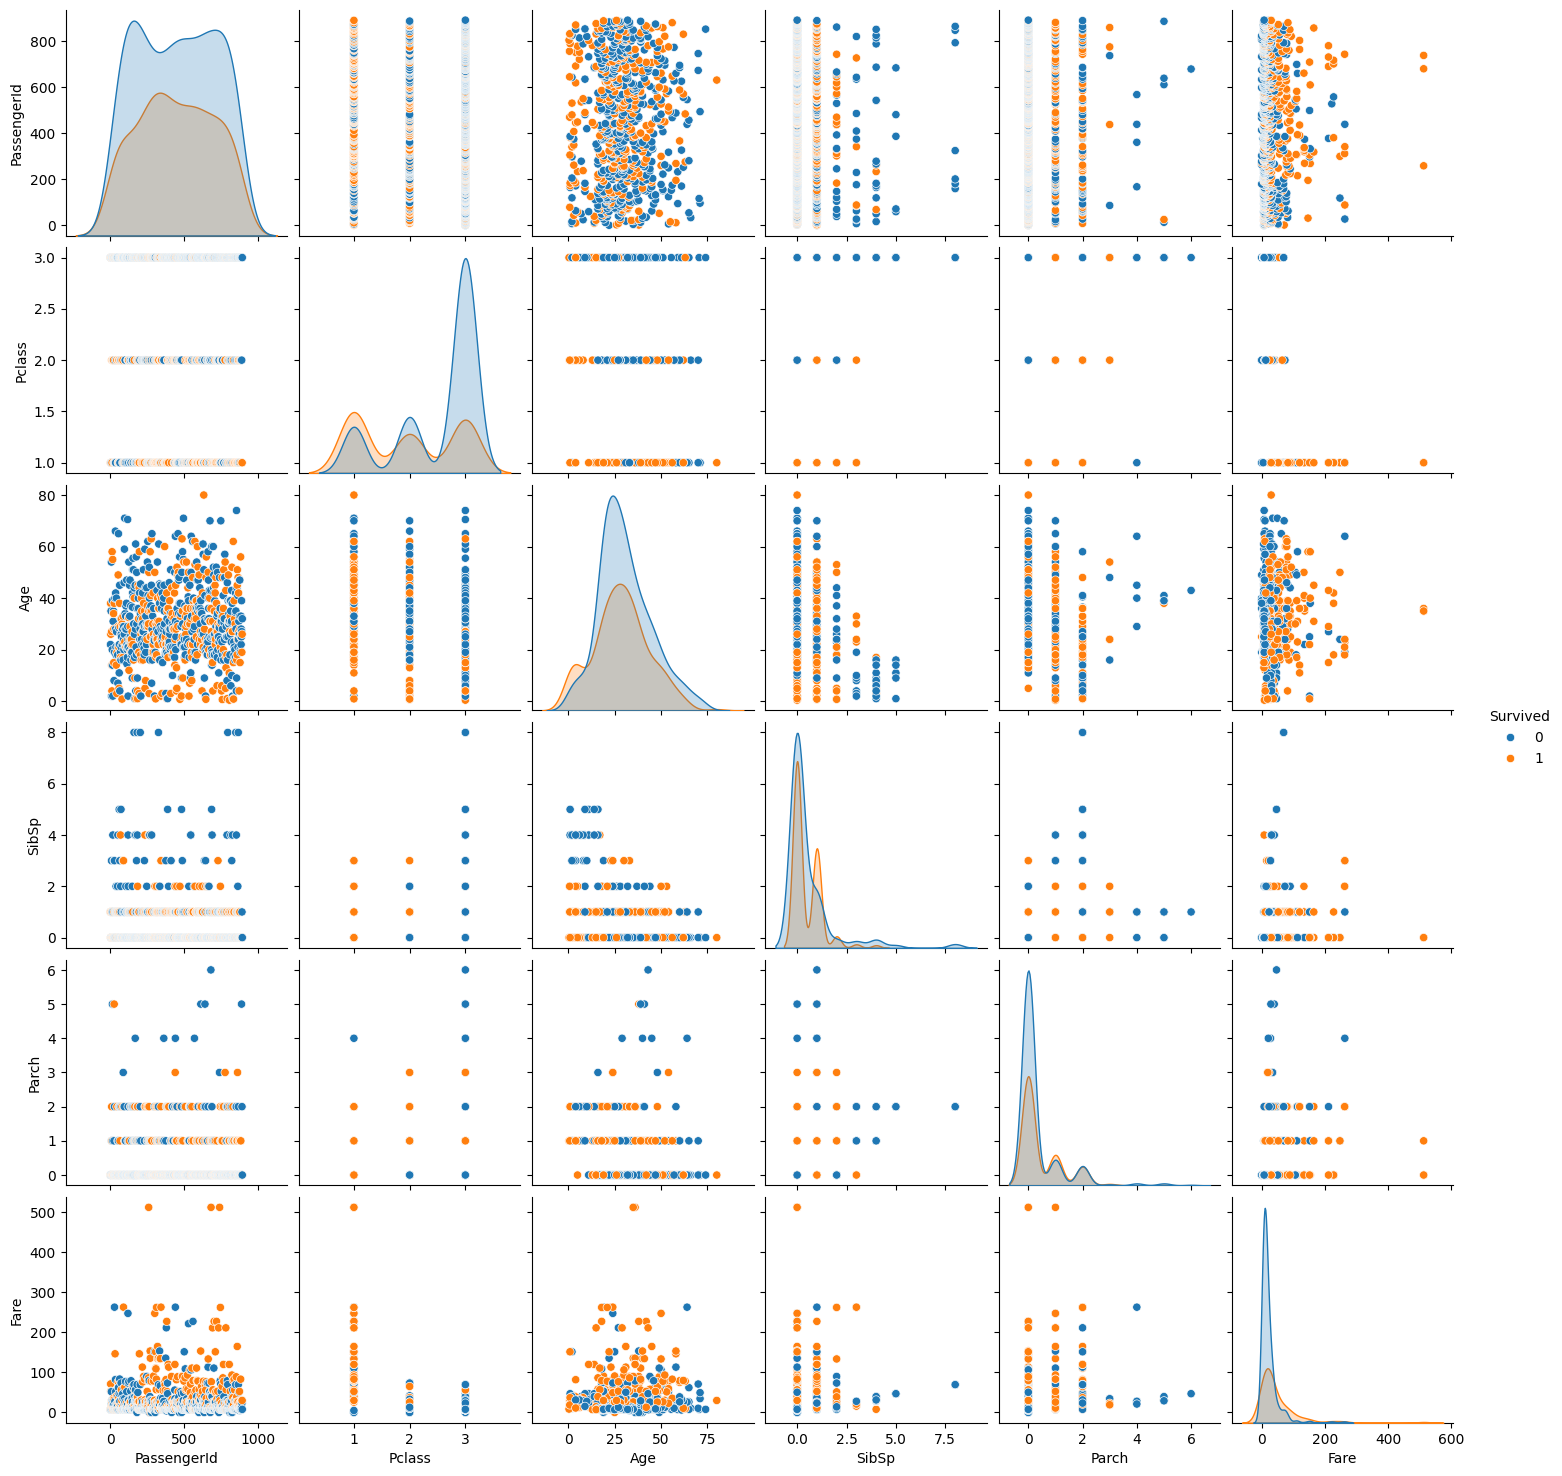

In [4]:
sns.pairplot(data = t_dataset, hue="Survived")
plt.show()

In [5]:
X = t_dataset.iloc[:, :-1]
Y = t_dataset["Survived"]
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
X.drop(columns="Name", inplace = True)
X.drop(columns="Ticket", inplace = True)
X.drop(columns="Cabin", inplace = True)

In [7]:
X.drop(columns="Fare", inplace = True)

In [8]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,3,male,22.0,1,0,S
1,2,1,female,38.0,1,0,C
2,3,3,female,26.0,0,0,S
3,4,1,female,35.0,1,0,S
4,5,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,S
887,888,1,female,19.0,0,0,S
888,889,3,female,NaN,1,2,S
889,890,1,male,26.0,0,0,C


In [9]:
X["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
X.fillna({"Age": X["Age"].mode()[0]}, inplace = True)

In [11]:
X.fillna({"Embarked":X["Embarked"].mode()[0]}, inplace = True)

In [12]:
le = LabelEncoder()
X["Embarked"]=le.fit_transform(X["Embarked"])

In [13]:
X.describe()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Embarked     891 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 48.9+ KB


In [14]:
X["Sex"] = pd.DataFrame(le.fit_transform(X["Sex"]), columns = ["Sex"])

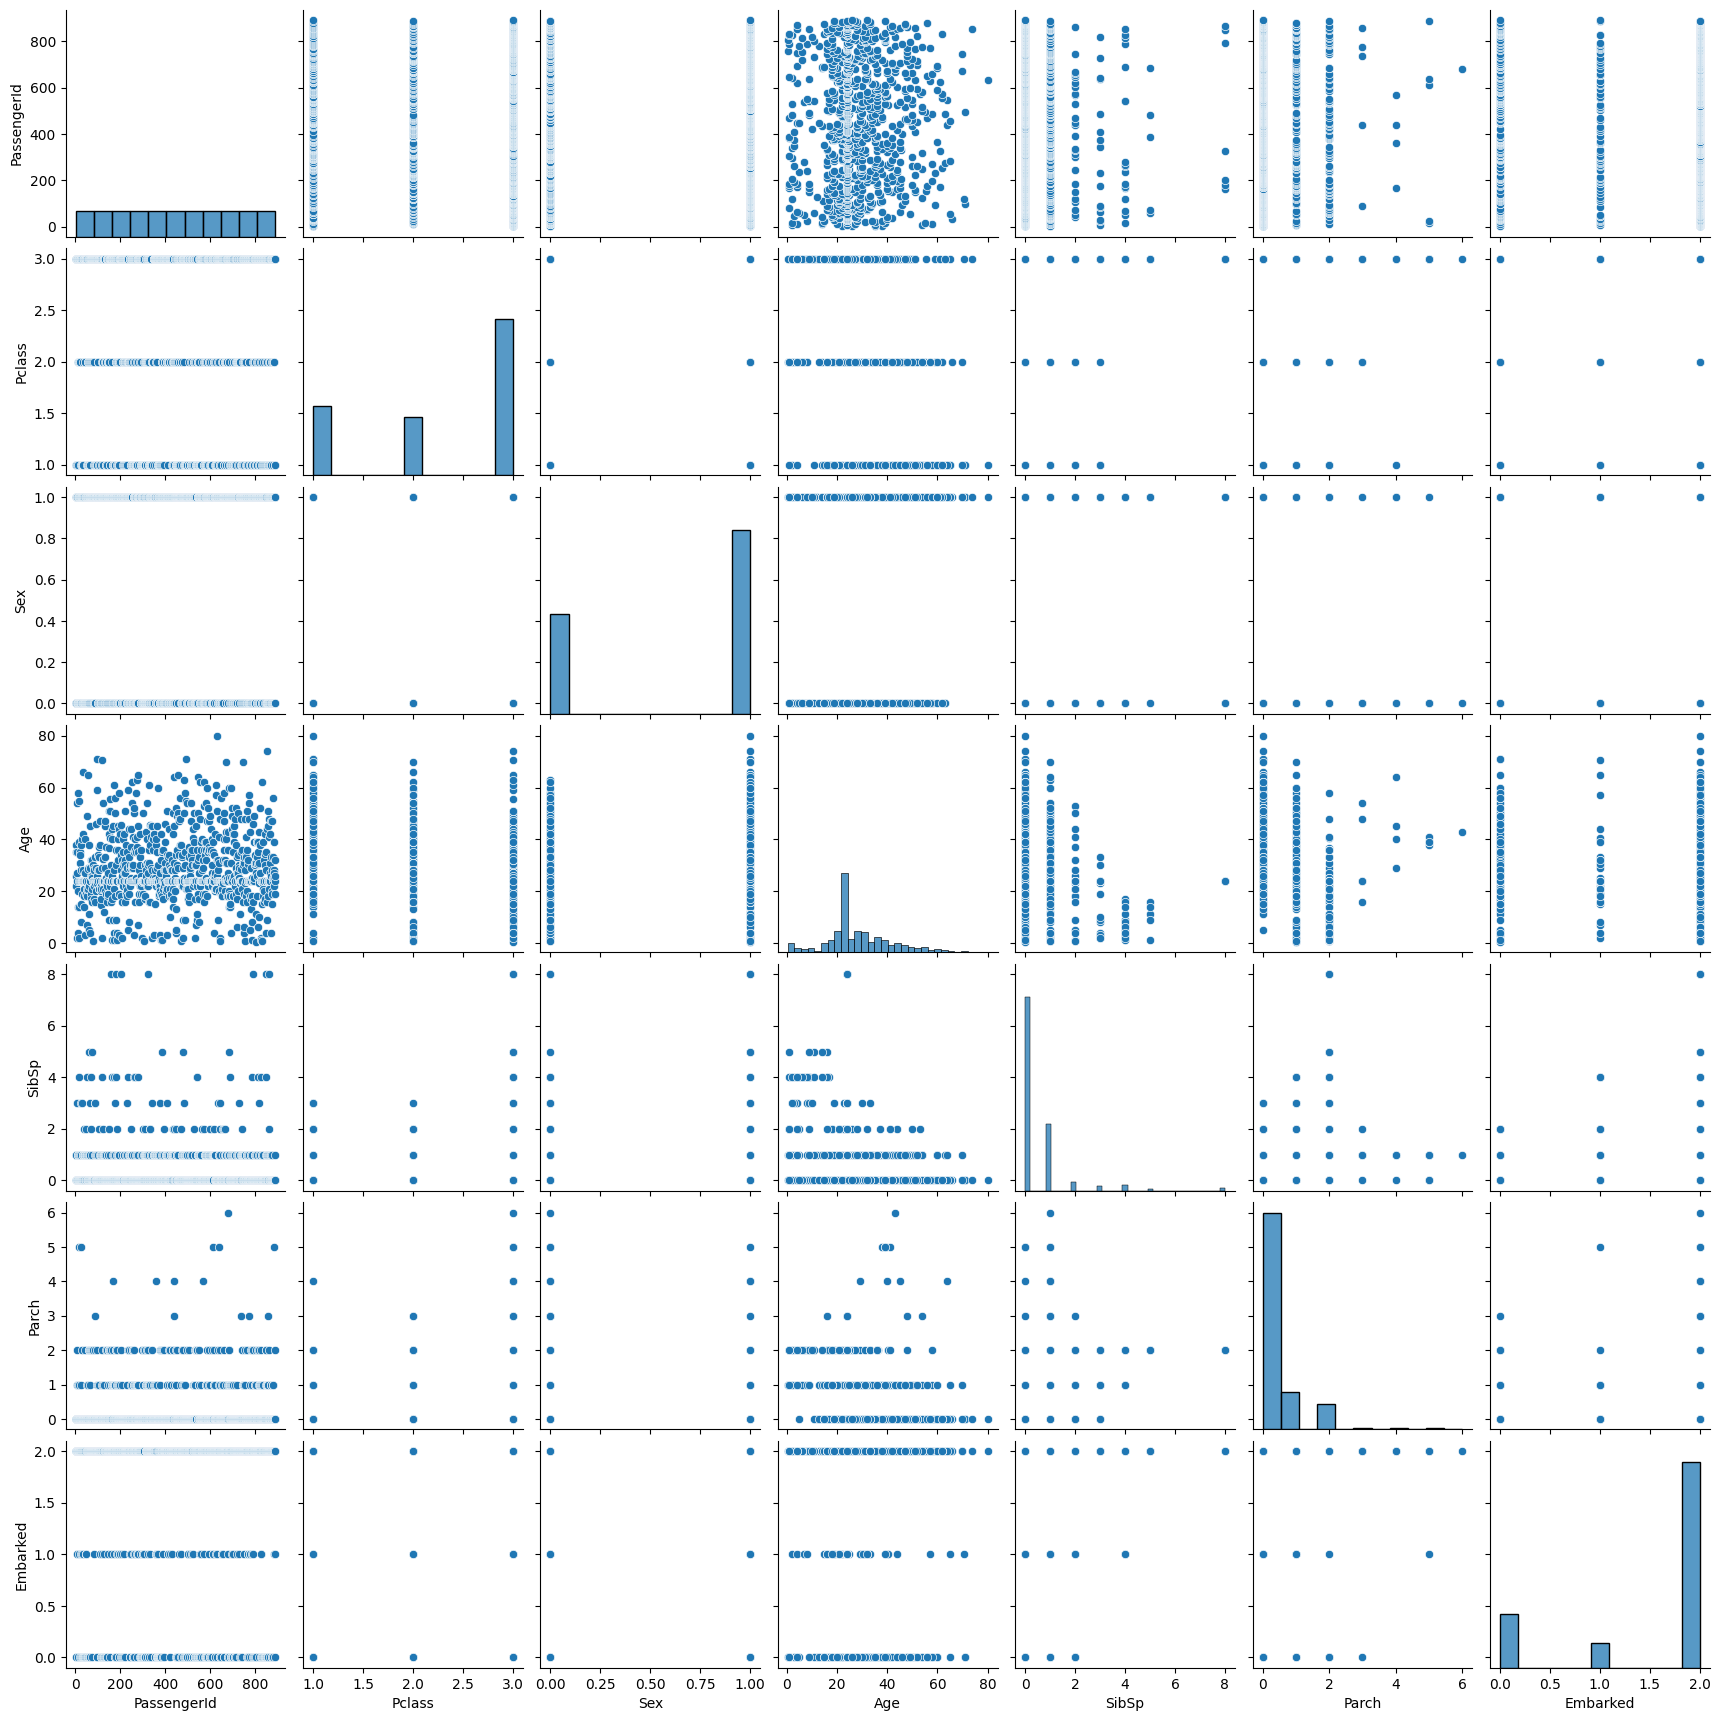

In [15]:
sns.pairplot(data = X )
plt.show()

In [16]:
x_train = X
y_train = Y

In [17]:
test_dataset = pd.read_csv("test.csv")
test_dataset.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1


In [18]:
test_dataset.drop(columns="Name", inplace = True)
test_dataset.drop(columns="Ticket", inplace = True)
test_dataset.drop(columns="Cabin", inplace = True)
test_dataset.drop(columns="Fare", inplace = True)

In [19]:
x_test = test_dataset.iloc[:, :-1]
y_test = test_dataset["Survived"]

In [20]:
x_test.isnull().sum()


PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [21]:
x_test.fillna({"Age": X["Age"].mode()[0]}, inplace = True)


In [22]:
la = LabelEncoder()
x_test["Sex"] = la.fit_transform(x_test["Sex"])
x_test["Embarked"] = la.fit_transform(x_test["Embarked"])


In [23]:
x_test.head(7)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,1
1,893,3,0,47.0,1,0,2
2,894,2,1,62.0,0,0,1
3,895,3,1,27.0,0,0,2
4,896,3,0,22.0,1,1,2
5,897,3,1,14.0,0,0,2
6,898,3,0,30.0,0,0,1


In [24]:
x_test["Embarked"].unique()

array([1, 2, 0])

In [25]:
x_train, y_train

(     PassengerId  Pclass  Sex   Age  SibSp  Parch  Embarked
 0              1       3    1  22.0      1      0         2
 1              2       1    0  38.0      1      0         0
 2              3       3    0  26.0      0      0         2
 3              4       1    0  35.0      1      0         2
 4              5       3    1  35.0      0      0         2
 ..           ...     ...  ...   ...    ...    ...       ...
 886          887       2    1  27.0      0      0         2
 887          888       1    0  19.0      0      0         2
 888          889       3    0  24.0      1      2         2
 889          890       1    1  26.0      0      0         0
 890          891       3    1  32.0      0      0         1
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

Logestic Regression

In [26]:
for i in range (1,100):
  lr = LogisticRegression(max_iter=890, solver= "liblinear", random_state= i )
  lr.fit(x_train, y_train)
  print("Testing Accuracy : ", lr.score(x_test, y_test)*100, "Train Accuracy : ",lr.score(x_train, y_train)*100)

Testing Accuracy :  94.25837320574163 Train Accuracy :  79.91021324354658
Testing Accuracy :  94.25837320574163 Train Accuracy :  79.91021324354658
Testing Accuracy :  94.25837320574163 Train Accuracy :  79.91021324354658
Testing Accuracy :  94.25837320574163 Train Accuracy :  79.91021324354658
Testing Accuracy :  94.25837320574163 Train Accuracy :  79.91021324354658
Testing Accuracy :  94.25837320574163 Train Accuracy :  79.91021324354658
Testing Accuracy :  94.25837320574163 Train Accuracy :  79.91021324354658
Testing Accuracy :  94.25837320574163 Train Accuracy :  79.91021324354658
Testing Accuracy :  94.25837320574163 Train Accuracy :  79.91021324354658
Testing Accuracy :  94.25837320574163 Train Accuracy :  79.91021324354658
Testing Accuracy :  94.25837320574163 Train Accuracy :  79.91021324354658
Testing Accuracy :  94.25837320574163 Train Accuracy :  79.91021324354658
Testing Accuracy :  94.25837320574163 Train Accuracy :  79.91021324354658
Testing Accuracy :  94.25837320574163 

In [27]:
lr.score(x_test, y_test)*100


94.25837320574163

In [28]:
lr.score(x_train, y_train)*100

79.91021324354658

Decision Tree Classification

In [29]:
for i in range(1, 30):
  dt = DecisionTreeClassifier(max_depth= i, criterion="entropy")
  dt.fit(x_train, y_train)
  print("Testing Accuracy : ", dt.score(x_test, y_test)*100, "Train Accuracy : ",dt.score(x_train, y_train)*100, "Depth = ", i)

Testing Accuracy :  100.0 Train Accuracy :  78.67564534231201 Depth =  1
Testing Accuracy :  82.77511961722487 Train Accuracy :  78.67564534231201 Depth =  2
Testing Accuracy :  87.32057416267942 Train Accuracy :  81.59371492704825 Depth =  3
Testing Accuracy :  86.1244019138756 Train Accuracy :  83.9506172839506 Depth =  4
Testing Accuracy :  94.49760765550239 Train Accuracy :  84.39955106621774 Depth =  5
Testing Accuracy :  72.48803827751196 Train Accuracy :  85.52188552188552 Depth =  6
Testing Accuracy :  85.4066985645933 Train Accuracy :  86.86868686868688 Depth =  7
Testing Accuracy :  72.48803827751196 Train Accuracy :  88.43995510662177 Depth =  8
Testing Accuracy :  85.64593301435407 Train Accuracy :  90.34792368125702 Depth =  9
Testing Accuracy :  78.22966507177034 Train Accuracy :  92.36812570145904 Depth =  10
Testing Accuracy :  75.5980861244019 Train Accuracy :  93.49046015712682 Depth =  11
Testing Accuracy :  80.14354066985646 Train Accuracy :  95.84736251402917 Depth

In [30]:
dt = DecisionTreeClassifier(max_depth= 7, criterion= "entropy")
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [31]:
dt.score(x_test, y_test)

0.854066985645933

In [32]:
dt.score(x_train, y_train)

0.8686868686868687

In [33]:
prediction = dt.predict(x_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier
for i in range(2, 100):
 rfc = RandomForestClassifier(criterion="entropy", max_depth=i, random_state= i, n_estimators=35, min_samples_split= 2)
 rfc.fit(x_train, y_train)
 print("Test Score : ", rfc.score(x_test, y_test)*100,"Train Score : ", rfc.score(x_train, y_train)*100, "defth : ", i)

Test Score :  83.01435406698565 Train Score :  80.47138047138047 defth :  2
Test Score :  90.66985645933015 Train Score :  82.60381593714928 defth :  3
Test Score :  85.64593301435407 Train Score :  83.5016835016835 defth :  4
Test Score :  82.53588516746412 Train Score :  84.39955106621774 defth :  5
Test Score :  78.4688995215311 Train Score :  86.19528619528619 defth :  6
Test Score :  80.14354066985646 Train Score :  88.327721661055 defth :  7
Test Score :  78.94736842105263 Train Score :  90.9090909090909 defth :  8
Test Score :  76.79425837320574 Train Score :  92.14365881032548 defth :  9
Test Score :  83.25358851674642 Train Score :  93.26599326599326 defth :  10
Test Score :  80.14354066985646 Train Score :  94.50056116722784 defth :  11
Test Score :  81.81818181818183 Train Score :  95.62289562289563 defth :  12
Test Score :  80.14354066985646 Train Score :  95.95959595959596 defth :  13
Test Score :  79.42583732057416 Train Score :  97.08193041526376 defth :  14
Test Score :

In [35]:
rfc.score(x_test,y_test)

0.7942583732057417

In [36]:
from sklearn.model_selection import GridSearchCV

In [ ]:
df = { 
    'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'random'
  
       
    }

In [41]:
gd = GridSearchCV(DecisionTreeClassifier(), param_grid= df)
gd.fit(x_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']})

In [44]:
gd.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'random'}

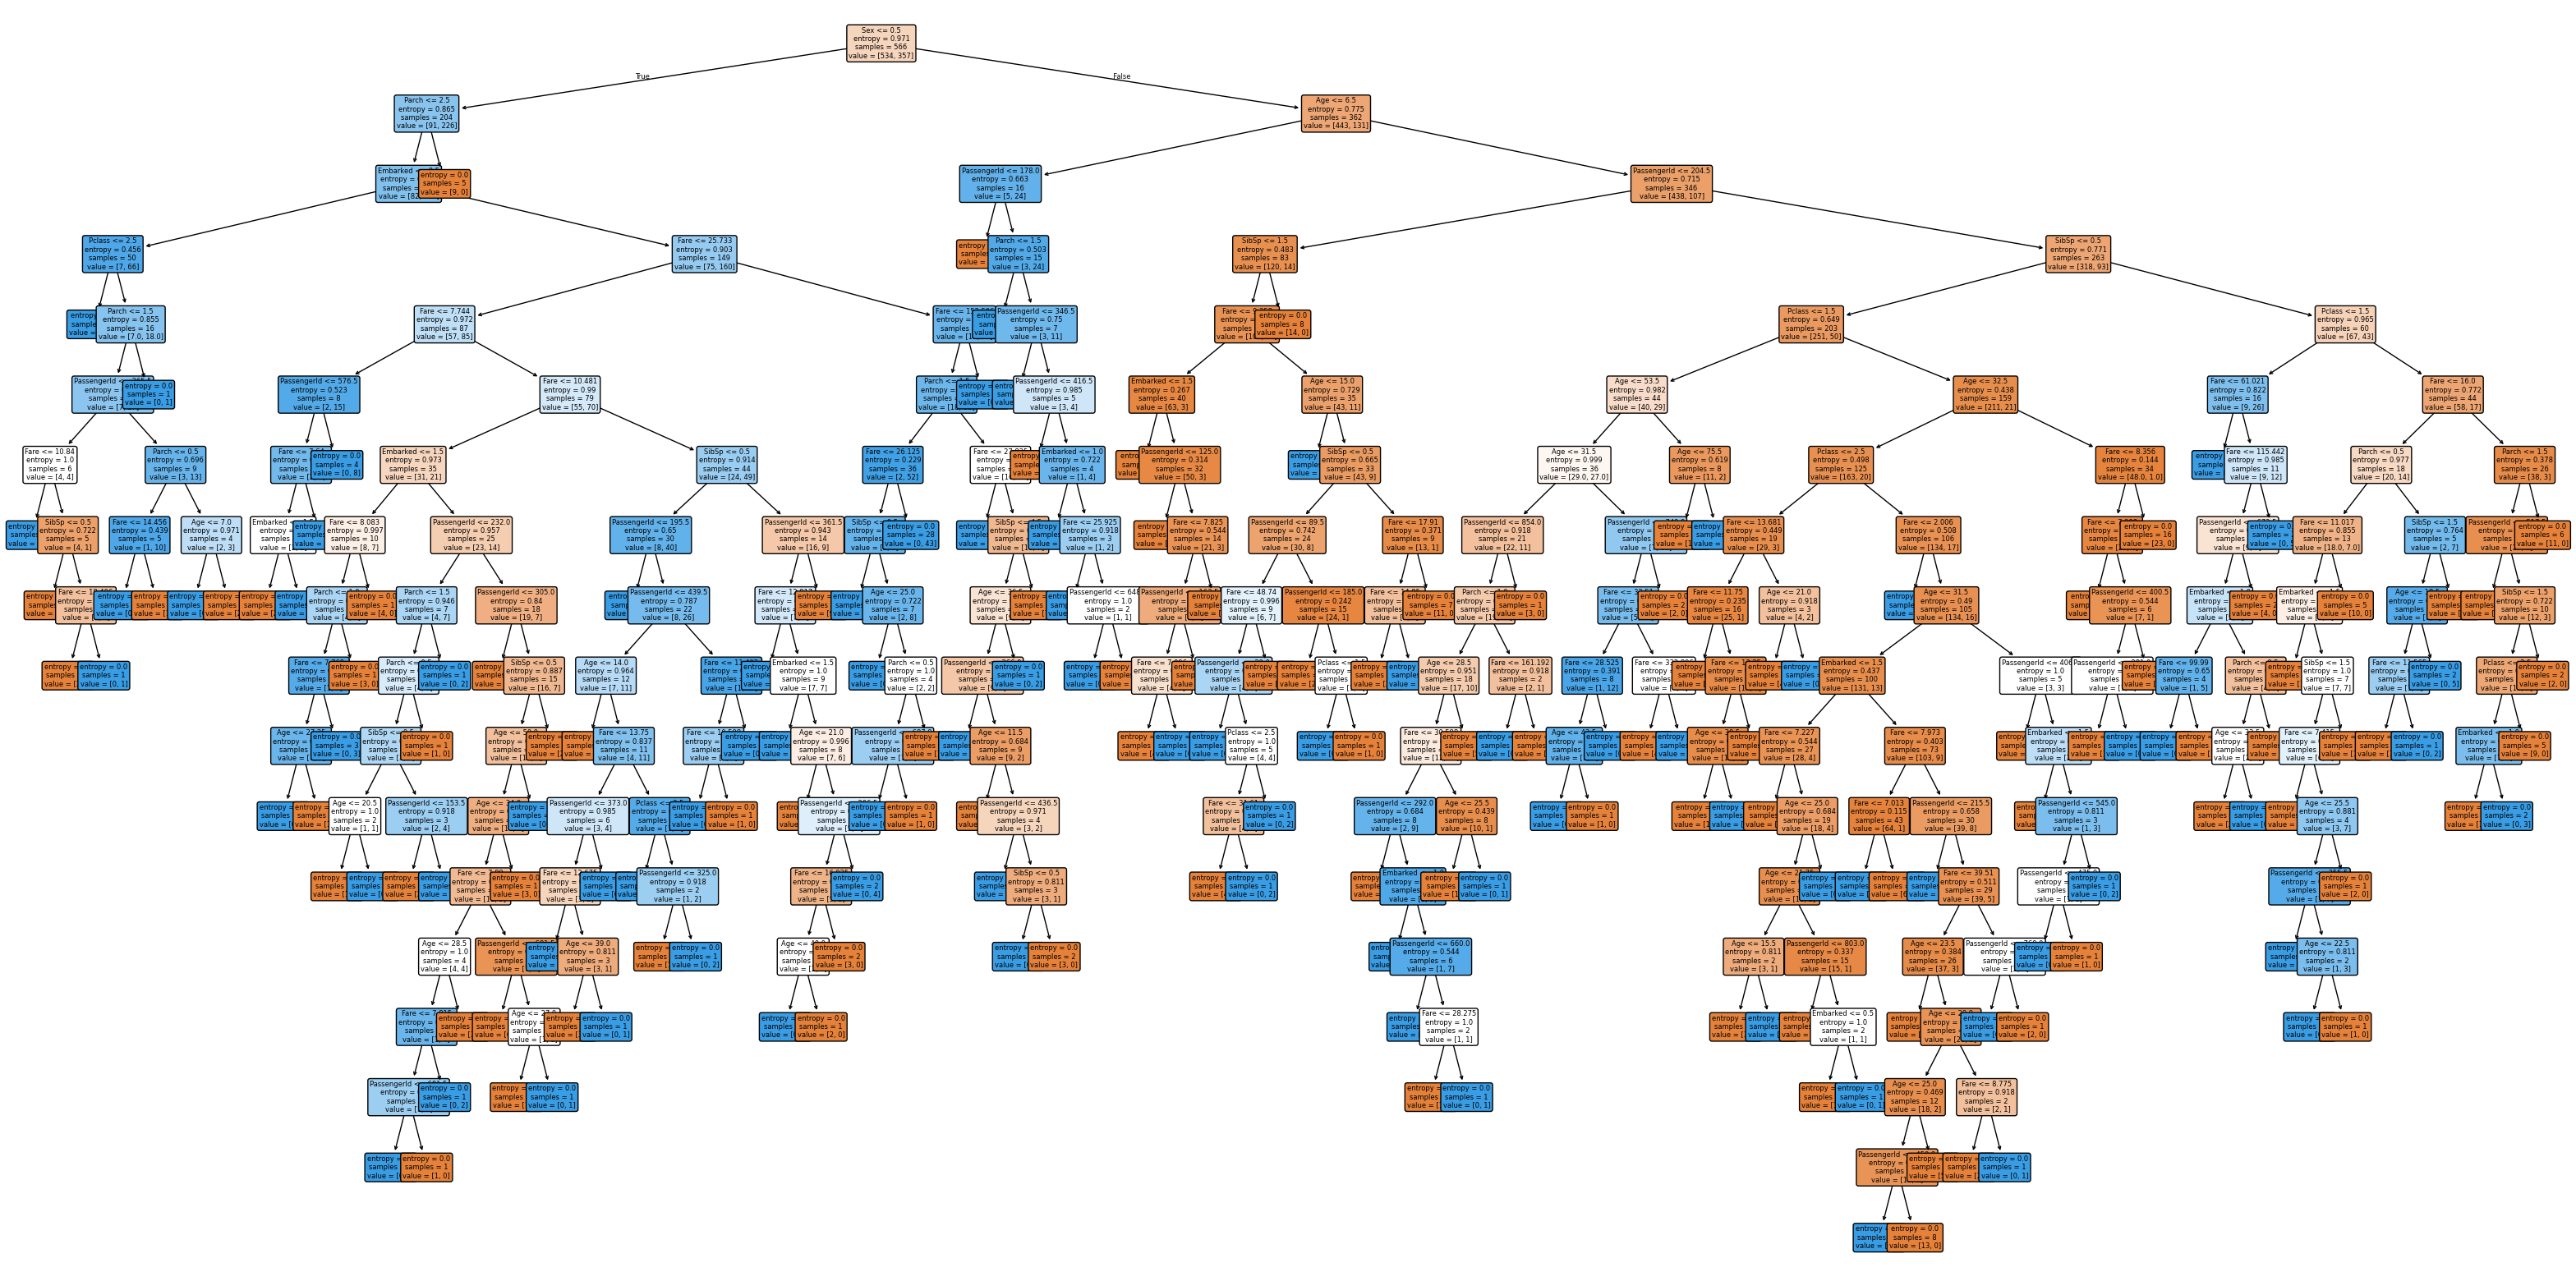

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 20))
plot_tree(rfc.estimators_[0], feature_names=list(x_train.columns), filled=True, rounded=True, fontsize=6)
plt.show()


In [ ]:
result_df = pd.DataFrame({'PassengerId': x_test['PassengerId'], 'Survived': dt.predict(x_test)})
result_df


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
result_df.to_csv("my_submission.csv", index=False)

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC(kernel= "poly", degree= 0)
sv.fit(x_train, y_train)

SVC(degree=0, kernel='poly')

In [ ]:
sv.score(x_test, y_test)

0.6363636363636364

In [ ]:
combined_train_data = pd.concat([x_train, y_train], axis=1)
combined_train_data.head(7)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.0,1,0,7.2500,2,0
1,2,1,0,38.0,1,0,71.2833,0,1
2,3,3,0,26.0,0,0,7.9250,2,1
3,4,1,0,35.0,1,0,53.1000,2,1
4,5,3,1,35.0,0,0,8.0500,2,0
5,6,3,1,24.0,0,0,8.4583,1,0
6,7,1,1,54.0,0,0,51.8625,2,0


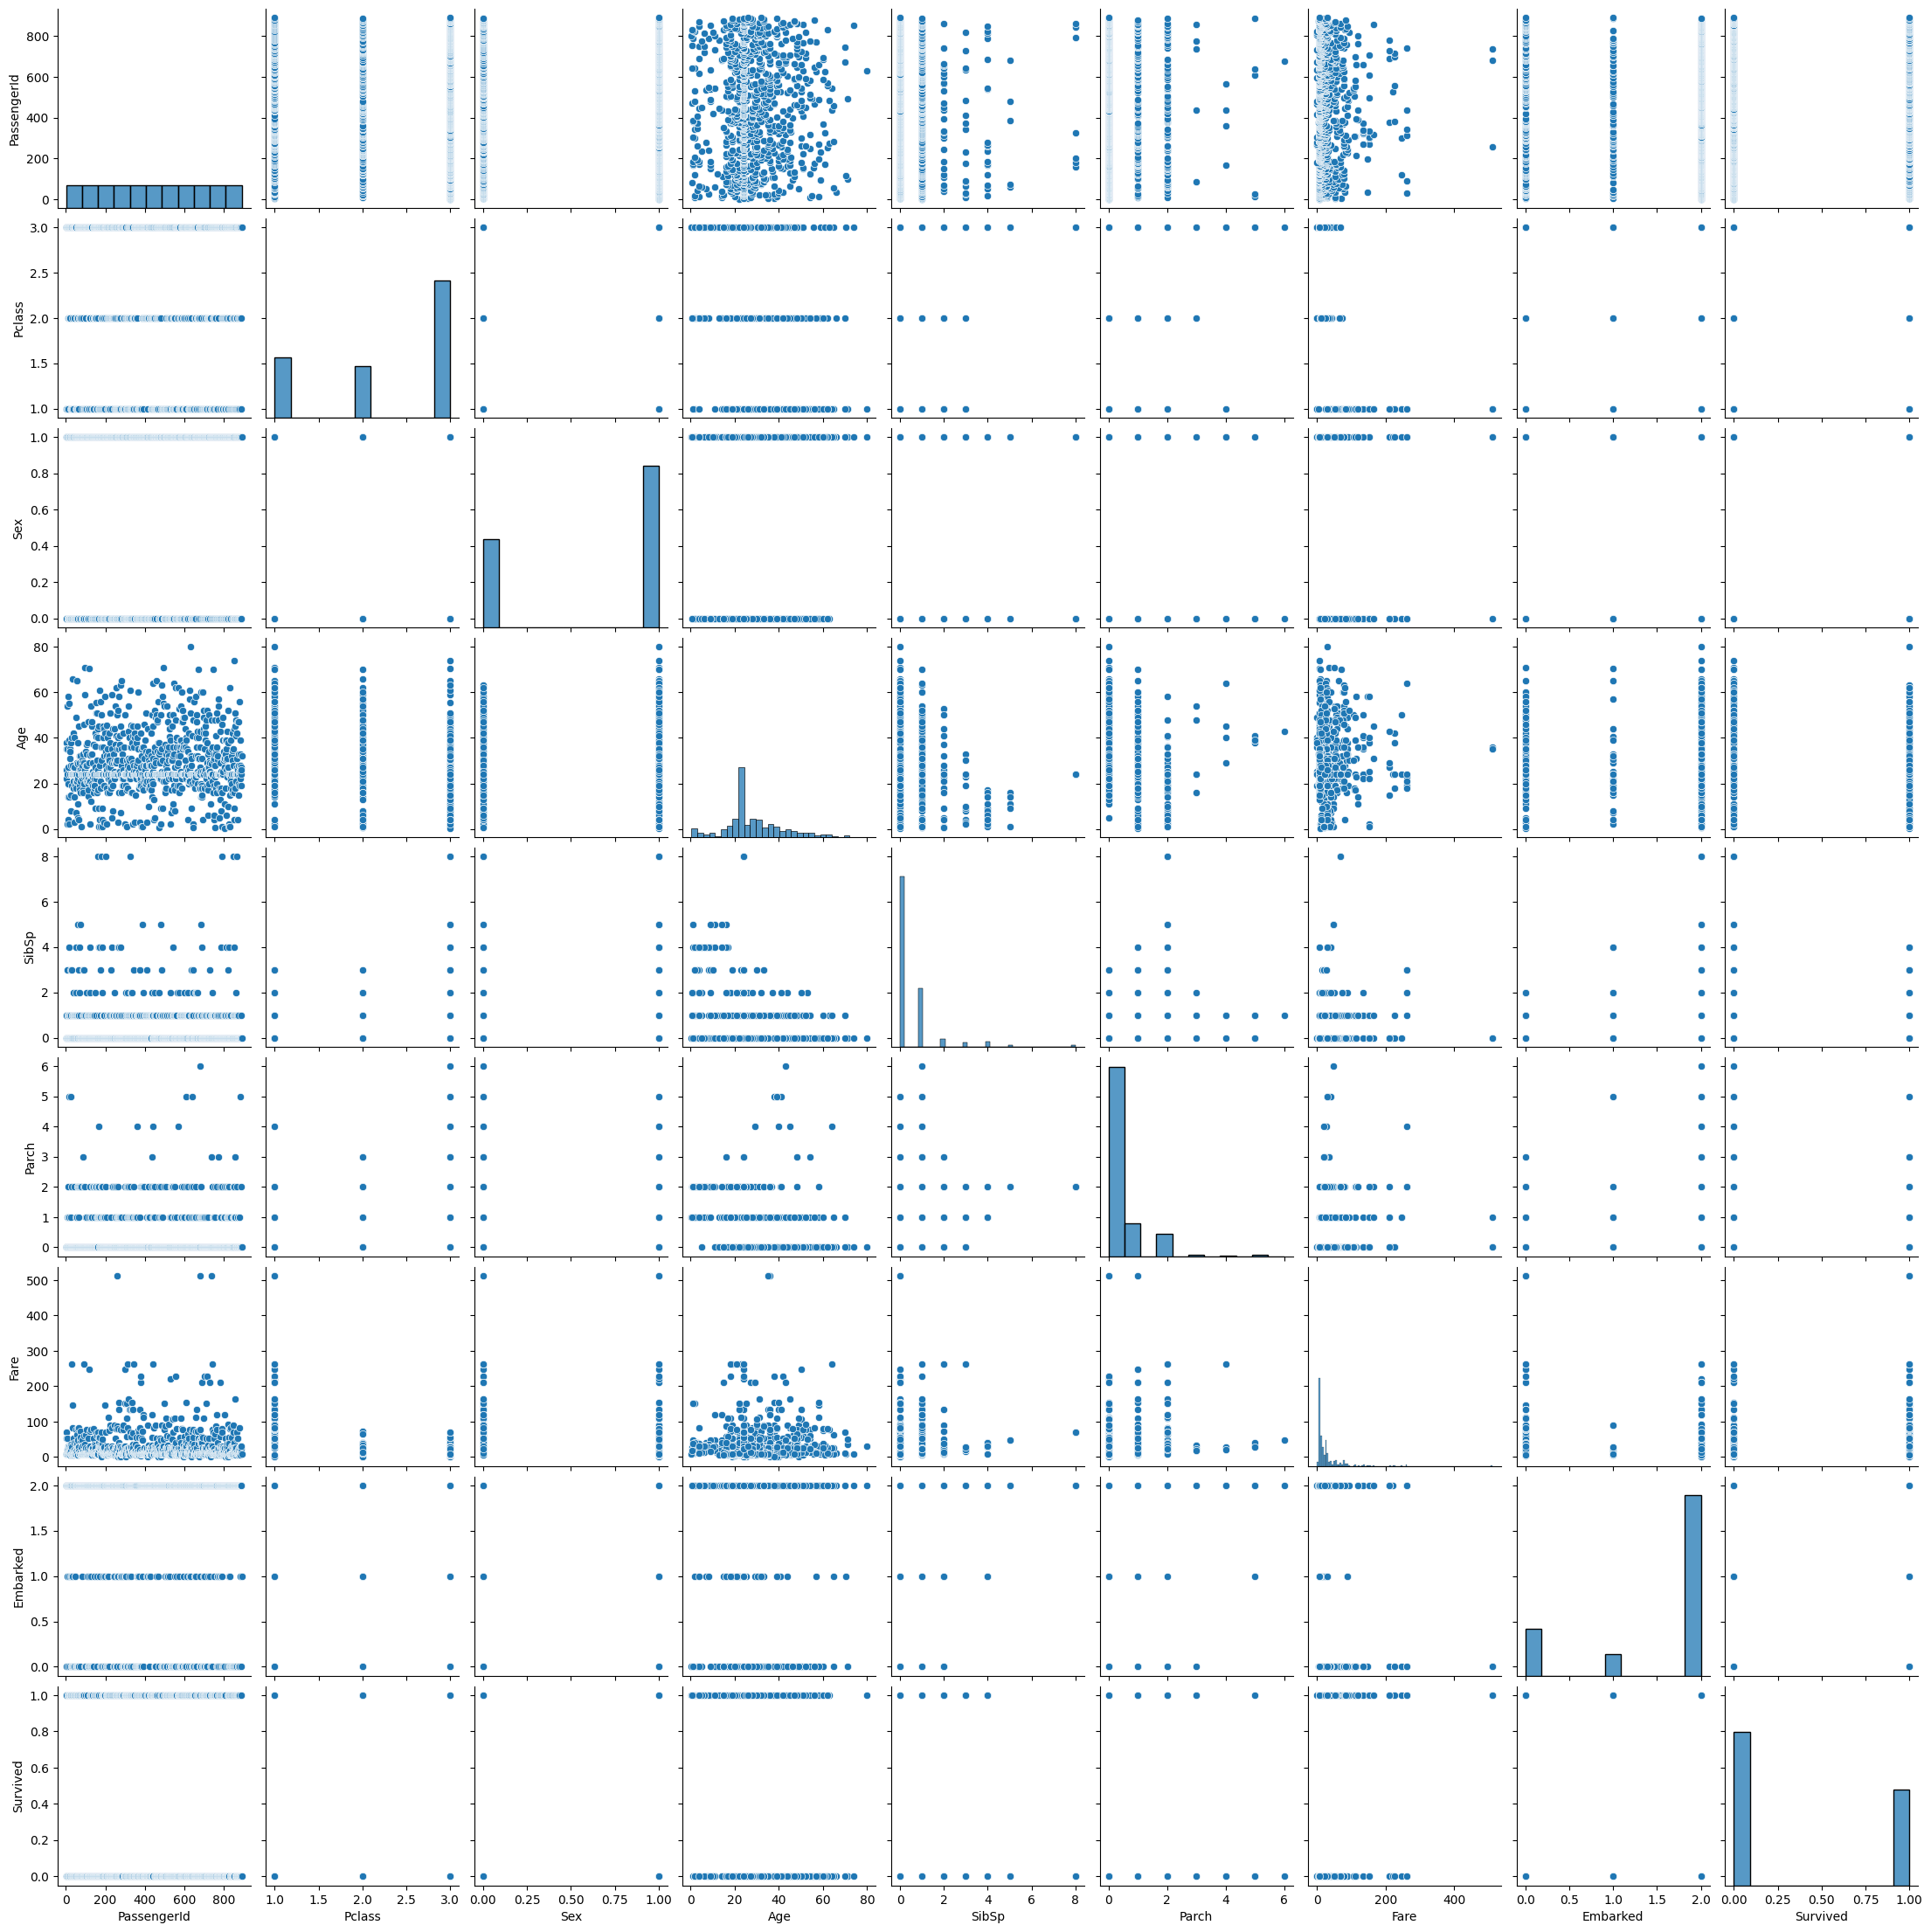

In [ ]:
sns.pairplot(data=combined_train_data)

C:\Users\divya\AppData\Local\Temp\ipykernel_14804\2969848208.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=combined_train_data, x='Sex', y='Survived', palette='muted')


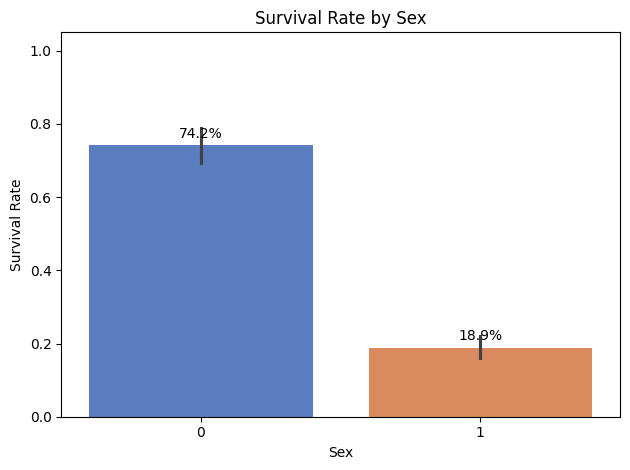

In [ ]:
ax = sns.barplot(data=combined_train_data, x='Sex', y='Survived', palette='muted')

# Add survival rate (%) above each bar
grouped = combined_train_data.groupby('Sex')['Survived'].mean() * 100

for i, (sex, percent) in enumerate(grouped.items()):
    ax.text(i, percent/100 + 0.02, f"{percent:.1f}%", ha='center', fontsize=10)

# Final plot styling
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.xlabel("Sex")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

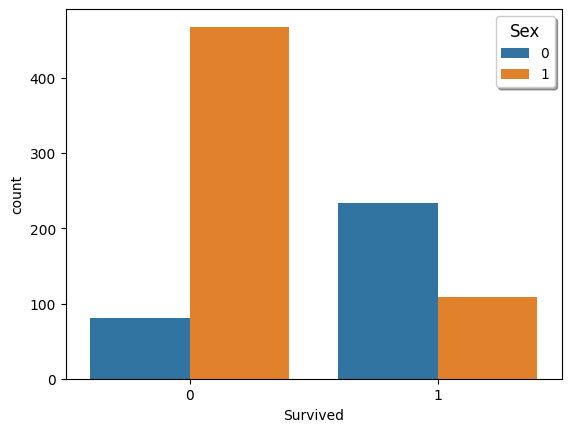

In [ ]:
sns.countplot(x='Survived',data=combined_train_data, hue = 'Sex')
plt.legend(title="Sex", loc="upper right", fontsize=10, title_fontsize=12, frameon=True, shadow=True, ncol=1)
plt.annotate
plt.show()

